# Analyzing NYC Subway Data using Pandas

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py

In [2]:
# Figure names
fig_prefix = '../figures/2015-09-15-as-subway-pd-lab-'

## Data Wrangling

### Importing the CSV

In [3]:
subway_df = pd.read_csv('../data/nyc_subway_weather.csv')

### Some information about the data

In [4]:
# Displays the first 5 rows
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [5]:
# Information about the data
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

## Data Exploration

### Looking into variables' correlation

In [6]:
def standardize(x):
    '''
    Returns a standardize/normalize dataframe of x
    
    Function argument:
    x -- a dataframe with 1 column
    '''
    standardized = (x - x.mean())/x.std(ddof=0)
    
    return standardized

def correlation(x, y):
    '''
    Returns the Pearson's R for variables x and y
    correlation = average of (x in standard units) times (y in standard units)
    '''
    std_x = standardize(x)
    std_y = standardize(y)
    prsn_r = (std_x*std_y).mean()
    
    return prsn_r

In [7]:
# Variable Data
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

#### Correlation between variables

In [8]:
print 'entries and rain: %f' % correlation(entries, rain)
print 'entries and temperature: %f' % correlation(entries, temp)
print 'rain and temperature: %f' % correlation(rain, temp)
print 'hourly entries and cumulative entries: %f' % correlation(entries, cum_entries)

entries and rain: 0.035649
entries and temperature: -0.026693
rain and temperature: -0.229034
hourly entries and cumulative entries: 0.585895


## Data Visualization

### Cumulative Entries by Location

In [9]:
grouped_by_loc = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
lati = grouped_by_loc['latitude']
longi = grouped_by_loc['longitude']
bubble_size = grouped_by_loc['ENTRIESn']/grouped_by_loc['ENTRIESn'].std()

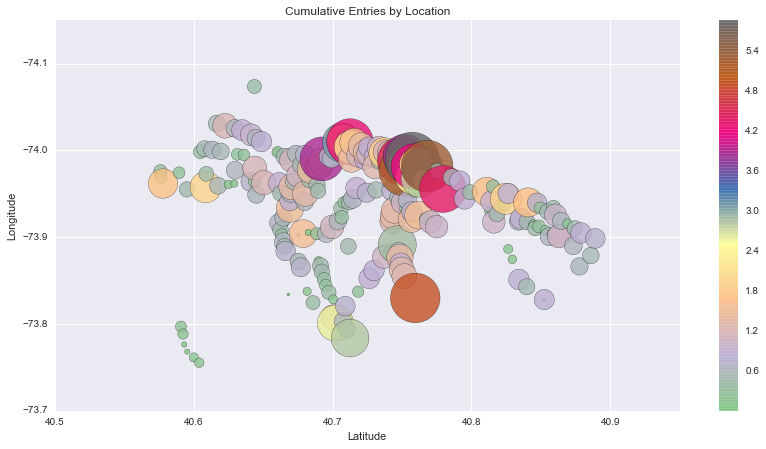

In [27]:
# Plot
plt.figure(figsize=(14,7))
plt.scatter(x=lati,y=longi,s=bubble_size*500, c=bubble_size, alpha=.8, cmap='Accent')
plt.colorbar()

# Plot Properties
plt.gca().invert_yaxis()
plt.title('Cumulative Entries by Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.savefig(fig_prefix+'cum_entries_by_loc')